In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fn to get Train Accuracy, Val Accuracy & KNN plot for different values of K

Comparing decision boundary for different value of k

fn = knn_comparison(data, k)

In [2]:
#Input :  k and data
#Output : The graph of the decision boundary
def knn_comparison(data, k): #k and the data are input to the function
    x = data[['X','Y']].values # independent features
    y = data['class'].astype(int).values # y -> target/true labels 
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    knn = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
    knn.fit(x_train, y_train) # train the model
    print("K : ",k)
    print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
    print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
    # Plotting decision region
    plot_decision_regions(x_train, y_train, clf = knn, legend=2) # it plots the decision boundary
    ##Adding axes annotations
    plt.xlabel('X') #Names the x-axis
    plt.ylabel('Y') #Names the y-axis
    plt.title('Knn with K='+ str(k)) #Names the graph
    plt.show() #Displays the graph 

# Fn to get Train Accuracy & Val Accuracy for different values of K without Scaling and splitting

Only getting accuracy values, no plotting data

knn_no_plot(data, k)

In [3]:
def knn_no_plot(data, k): #k and the data are input to the function
    x = data[['X','Y']].values # independent features
    y = data['class'].astype(int).values # y -> target/true labels 
    clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
    clf.fit(x, y) # train the model
    print("K : ", k, " Train Accuracy : ", clf.score(x,y), " Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))  # test the model and it computes the accuracy (train data accuracy)
    # Plotting decision region
    # plot_decision_regions(x, y, clf=clf, legend=2) # it plots the decision boundary
    # # Adding axes annotations
    # plt.xlabel('X') #Names the x-axis
    # plt.ylabel('Y') #Names the y-axis
    # plt.title('Knn with K='+ str(k)) #Names the graph
    # plt.show() #Displays the graph 

# Fn to get Train Accuracy, Val Accuracy & Logisitic Regression plot for different values of K without Scaling and splitting

logistic(data, k = 0)

In [4]:
#Same as above, but with logreg
def logistic(data, k = 0):
    x = data[['X','Y']].values
    y = data['class'].astype(int).values
    clf = LogisticRegression()
    clf.fit(x, y)
    print("K : ",k)
    print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)
    print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=5)))
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Logistic Regression decision boundary')
    plt.show()

# U Shaped

In [47]:
data1 = pd.read_csv('ushape.csv')
data1

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0
...,...,...,...
95,1.7000,0.5880,1.0
96,0.2190,-0.6530,1.0
97,0.9530,-0.4200,1.0
98,-1.3200,0.4230,0.0


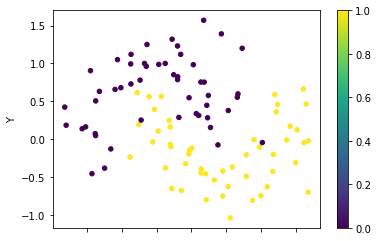

In [48]:
data1.plot(x='X', y='Y', c=data1['class'], kind='scatter', colormap='viridis')

In [49]:
# Separating features & target and splitting them as training & testing dataset
X = data1[['X','Y']].values
y = data1['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=7)

# Scaling train and test dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [50]:
# Calculating train and cv score on different K values
k=[]
train_score=[]
cv_score=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    k.append(i)
    train_score.append(knn.score(x_train,y_train))
    cv_score.append(np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
    #print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model
score = {'K':k,'Train_Score':train_score,'CV_Score':cv_score}
score = pd.DataFrame(score)

In [51]:
score

,K,Train_Score,CV_Score
0,1,1.000000,0.942857
1,2,0.971429,0.942857
2,3,0.985714,0.928571
3,4,0.971429,0.957143
4,5,0.985714,0.971429
5,6,0.985714,0.928571
6,7,0.985714,0.942857
7,8,0.942857,0.928571
8,9,0.942857,0.928571
9,10,0.942857,0.914286


k = 5 is the best value of k - hyperparameter tuning

In [52]:
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
print('PREDICTING KNN SCORE OF X,Y(0.6,-0.4):', knn.predict(scaler.transform([[0.6,-0.4]])))

PREDICTING KNN SCORE OF X,Y(0.6,-0.4): [1.]


In [53]:
print('KNN SCORE OF TEST DATASET:',knn.score(x_test,y_test)) 

KNN SCORE OF TEST DATASET: 0.9


In [54]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,80]: #hit n trial
    knn_no_plot(data1,i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.93
K :  2  Train Accuracy :  0.95  Val Accuracy :  0.93
K :  3  Train Accuracy :  0.96  Val Accuracy :  0.95
K :  4  Train Accuracy :  0.96  Val Accuracy :  0.9400000000000001
K :  5  Train Accuracy :  0.96  Val Accuracy :  0.95
K :  6  Train Accuracy :  0.96  Val Accuracy :  0.93
K :  7  Train Accuracy :  0.96  Val Accuracy :  0.93
K :  8  Train Accuracy :  0.96  Val Accuracy :  0.93
K :  9  Train Accuracy :  0.95  Val Accuracy :  0.9199999999999999
K :  10  Train Accuracy :  0.92  Val Accuracy :  0.9199999999999999
K :  20  Train Accuracy :  0.93  Val Accuracy :  0.8800000000000001
K :  30  Train Accuracy :  0.92  Val Accuracy :  0.86
K :  40  Train Accuracy :  0.89  Val Accuracy :  0.8200000000000001
K :  80  Train Accuracy :  0.73  Val Accuracy :  0.5


K :  1
Train Accuracy :  1.0
Val Accuracy :  0.8857142857142858


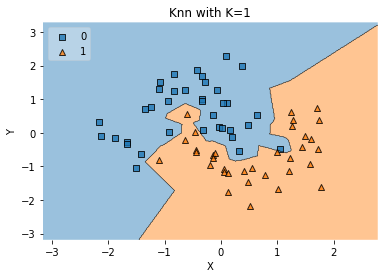

K :  3
Train Accuracy :  0.9571428571428572
Val Accuracy :  0.9428571428571428


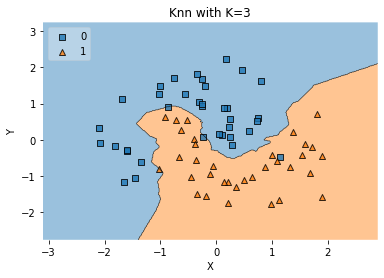

K :  5
Train Accuracy :  0.9714285714285714
Val Accuracy :  0.9142857142857143


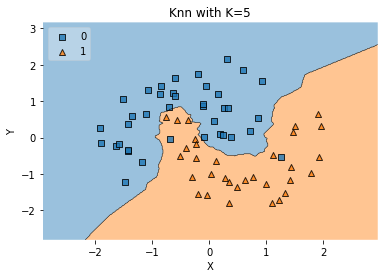

K :  20
Train Accuracy :  0.8
Val Accuracy :  0.8


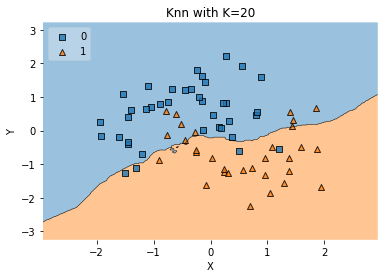

K :  30
Train Accuracy :  0.8
Val Accuracy :  0.8142857142857143


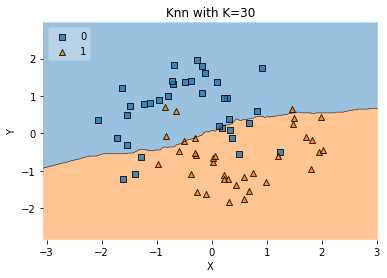

K :  40
Train Accuracy :  0.8857142857142857
Val Accuracy :  0.8714285714285713


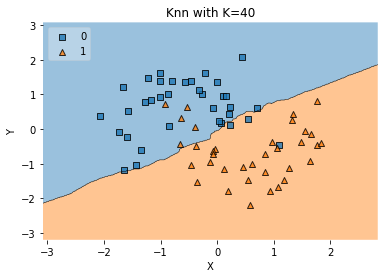

In [13]:
for i in [1,3,5,20,30,40]: #hit n trial
    knn_comparison(data1,i)

# Concentric Circles

In [14]:
data2 = pd.read_csv('concertriccir2.csv')
data2

,X,Y,class
0,0.700,-0.247,0.0
1,-3.950,2.740,1.0
2,0.150,-2.160,1.0
3,-1.670,-0.942,1.0
4,2.560,-1.850,1.0
...,...,...,...
495,2.180,2.980,1.0
496,1.780,2.870,1.0
497,0.894,3.070,0.0
498,0.849,3.880,0.0


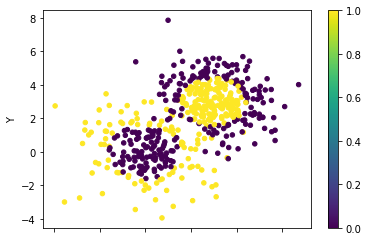

In [15]:
data2.plot(x='X', y='Y', c=data2['class'], kind='scatter', colormap='viridis')

In [16]:
# Separating features & target and splitting them as training & testing dataset
X = data2[['X','Y']].values
y = data2['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=7)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
k=[]
train_score=[]
cv_score=[]

# Calculating train and cv score on different K values
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn2 = KNeighborsClassifier(i) #initialising the model
    knn2.fit(x_train,y_train) # training the model
    #print("K value  : " , i, " train score : ", knn2.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn2, x_train, y_train, cv=10))) #predicting using the model
    k.append(i)
    train_score.append(knn2.score(x_train,y_train))
    cv_score.append(np.mean(cross_val_score(knn2, x_train, y_train, cv=10)))
    
score = {'K':k,'Train_Score':train_score,'CV_Score':cv_score}
score = pd.DataFrame(score)

n fold Cross validation where n being 10

In [18]:
score

,K,Train_Score,CV_Score
0,1,1.000000,0.905714
1,2,0.960000,0.882857
2,3,0.951429,0.900000
3,4,0.934286,0.880000
4,5,0.948571,0.885714
5,6,0.940000,0.882857
6,7,0.937143,0.897143
7,8,0.925714,0.888571
8,9,0.917143,0.882857
9,10,0.905714,0.860000


k = 1 is the best value of k - hyperparameter tuning

In [19]:
knn2 = KNeighborsClassifier(3)
knn2.fit(x_train,y_train)
print('PREDICTING KNN SCORE OF X,Y(0.6,-0.4):', knn2.predict(scaler.transform([[0.6,-0.4]])))

PREDICTING KNN SCORE OF X,Y(0.6,-0.4): [0.]


In [20]:
print('KNN SCORE OF TEST DATASET:',knn2.score(x_test,y_test)) 

KNN SCORE OF TEST DATASET: 0.8866666666666667


n fold Cross validation where n being 5

In [21]:
for i in [1,3,5,6,8,10,20,30,40,80]:
    knn_no_plot(data2, i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.866
K :  3  Train Accuracy :  0.952  Val Accuracy :  0.8640000000000001
K :  5  Train Accuracy :  0.934  Val Accuracy :  0.8800000000000001
K :  6  Train Accuracy :  0.93  Val Accuracy :  0.8400000000000001
K :  8  Train Accuracy :  0.934  Val Accuracy :  0.834
K :  10  Train Accuracy :  0.916  Val Accuracy :  0.8220000000000001
K :  20  Train Accuracy :  0.888  Val Accuracy :  0.772
K :  30  Train Accuracy :  0.852  Val Accuracy :  0.736
K :  40  Train Accuracy :  0.822  Val Accuracy :  0.6940000000000001
K :  80  Train Accuracy :  0.684  Val Accuracy :  0.596


K :  1
Train Accuracy :  1.0
Val Accuracy :  0.8799999999999999


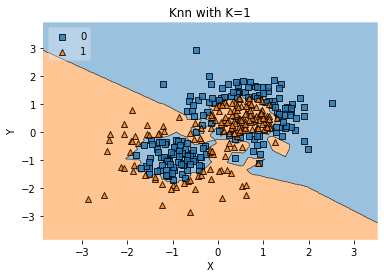

K :  3
Train Accuracy :  0.94
Val Accuracy :  0.8685714285714285


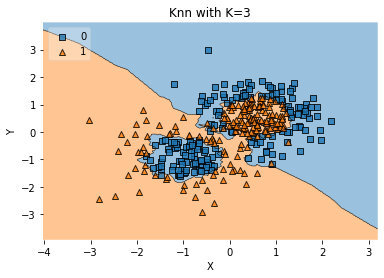

K :  5
Train Accuracy :  0.94
Val Accuracy :  0.8885714285714286


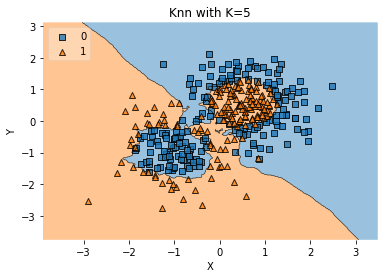

K :  6
Train Accuracy :  0.9085714285714286
Val Accuracy :  0.8400000000000001


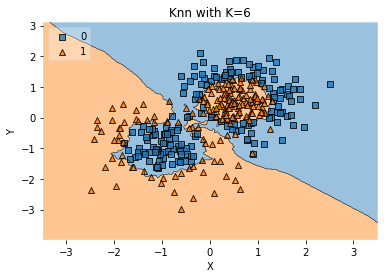

K :  8
Train Accuracy :  0.9171428571428571
Val Accuracy :  0.8685714285714287


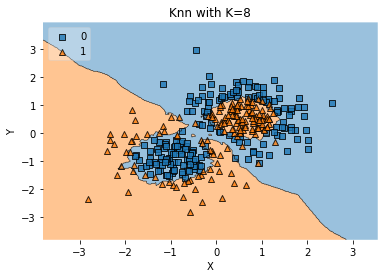

K :  10
Train Accuracy :  0.8942857142857142
Val Accuracy :  0.8542857142857143


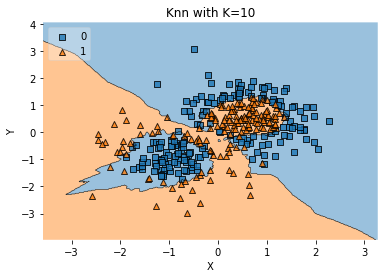

K :  20
Train Accuracy :  0.8714285714285714
Val Accuracy :  0.8371428571428572


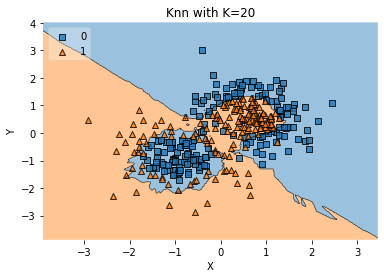

K :  30
Train Accuracy :  0.8028571428571428
Val Accuracy :  0.76


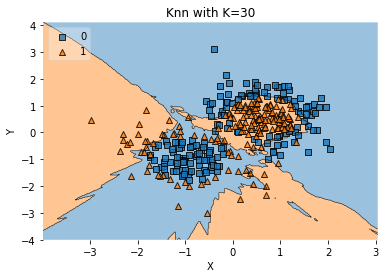

K :  40
Train Accuracy :  0.7457142857142857
Val Accuracy :  0.7171428571428571


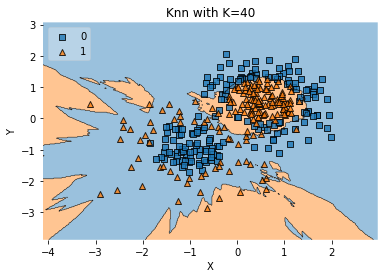

K :  80
Train Accuracy :  0.6457142857142857
Val Accuracy :  0.6000000000000001


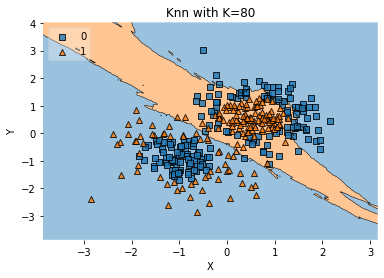

In [22]:
for i in [1,3,5,6,8,10,20,30,40,80]:
    knn_comparison(data2, i)

# XOR Dataset

In [23]:
data3 = pd.read_csv('xor.csv')
data3.columns=['X','Y','class']
data3

,X,Y,class
0,0.978738,2.240893,-1.0
1,1.867558,-0.977278,1.0
2,0.950088,-0.151357,1.0
3,-0.103219,0.410599,1.0
4,0.144044,1.454274,-1.0
...,...,...,...
494,0.441033,0.178793,-1.0
495,-0.799422,0.240788,1.0
496,0.289121,0.412871,-1.0
497,-0.198399,0.094192,1.0


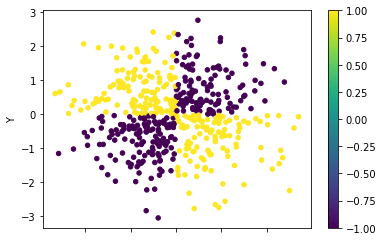

In [24]:
data3.plot(x='X', y='Y', c=data3['class'], kind='scatter', colormap='viridis')

In [25]:
# Separating features & target and splitting them as training & testing dataset
X = data3[['X','Y']].values
y = data3['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=7)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
k=[]
train_score=[]
cv_score=[]

# Calculating train and cv score on different K values
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn3 = KNeighborsClassifier(i) #initialising the model
    knn3.fit(x_train,y_train) # training the model
    #print("K value  : " , i, " train score : ", knn2.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn2, x_train, y_train, cv=10))) #predicting using the model
    k.append(i)
    train_score.append(knn3.score(x_train,y_train))
    cv_score.append(np.mean(cross_val_score(knn3, x_train, y_train, cv=10)))
    
score = {'K':k,'Train_Score':train_score,'CV_Score':cv_score}
score = pd.DataFrame(score)

n fold Cross validation where n being 10

In [27]:
score

,K,Train_Score,CV_Score
0,1,1.000000,0.962857
1,2,0.982808,0.962773
2,3,0.991404,0.977143
3,4,0.985673,0.960000
4,5,0.988539,0.968571
5,6,0.979943,0.957143
6,7,0.979943,0.957143
7,8,0.971347,0.948487
8,9,0.982808,0.965714
9,10,0.977077,0.968487


k = 3 is the best value of k - hyperparameter tuning

In [28]:
knn3 = KNeighborsClassifier(3)
knn3.fit(x_train,y_train)
print('PREDICTING KNN SCORE OF X,Y(0.6,-0.4):', knn3.predict(scaler.transform([[0.6,-0.4]])))

PREDICTING KNN SCORE OF X,Y(0.6,-0.4): [1.]


In [29]:
print('KNN SCORE OF TEST DATASET:',knn3.score(x_test,y_test)) 

KNN SCORE OF TEST DATASET: 0.94


n fold Cross validation where n being 5

In [30]:
for i in [1,3,5,6,8,10,20,30,40,80]:
    knn_no_plot(data3, i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.9518383838383839
K :  3  Train Accuracy :  0.9819639278557114  Val Accuracy :  0.9658989898989899
K :  5  Train Accuracy :  0.9799599198396793  Val Accuracy :  0.965939393939394
K :  6  Train Accuracy :  0.9839679358717435  Val Accuracy :  0.9699191919191918
K :  8  Train Accuracy :  0.9859719438877755  Val Accuracy :  0.9658787878787878
K :  10  Train Accuracy :  0.9839679358717435  Val Accuracy :  0.975939393939394
K :  20  Train Accuracy :  0.9719438877755511  Val Accuracy :  0.9538585858585857
K :  30  Train Accuracy :  0.9619238476953907  Val Accuracy :  0.94789898989899
K :  40  Train Accuracy :  0.9719438877755511  Val Accuracy :  0.9538989898989898
K :  80  Train Accuracy :  0.935871743486974  Val Accuracy :  0.9076767676767676


K :  1
Train Accuracy :  1.0
Val Accuracy :  0.9484873949579832


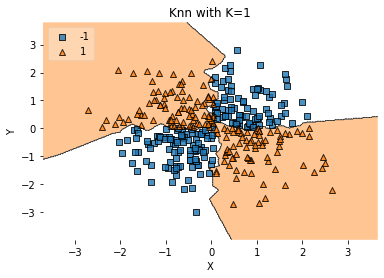

K :  2
Train Accuracy :  0.9828080229226361
Val Accuracy :  0.945546218487395


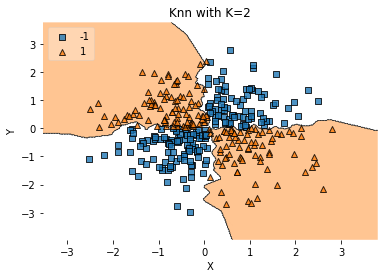

K :  3
Train Accuracy :  0.9885386819484241
Val Accuracy :  0.9627731092436974


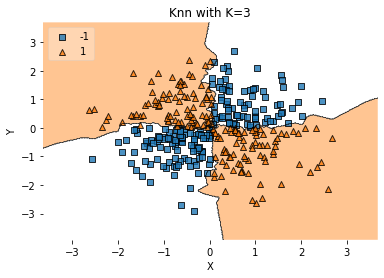

K :  4
Train Accuracy :  0.9684813753581661
Val Accuracy :  0.9542016806722688


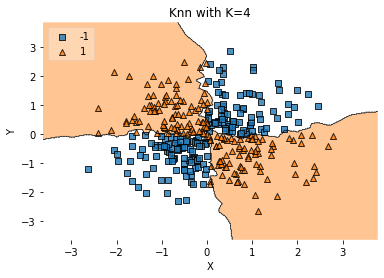

K :  5
Train Accuracy :  0.9856733524355301
Val Accuracy :  0.9655462184873949


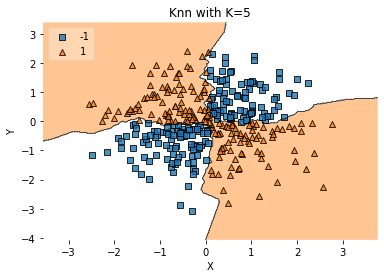

K :  6
Train Accuracy :  0.9828080229226361
Val Accuracy :  0.9626890756302521


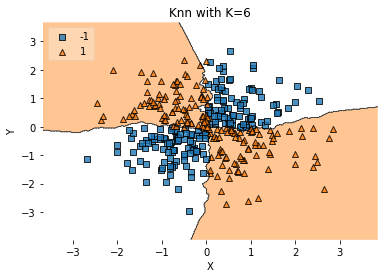

K :  7
Train Accuracy :  0.9856733524355301
Val Accuracy :  0.9742857142857144


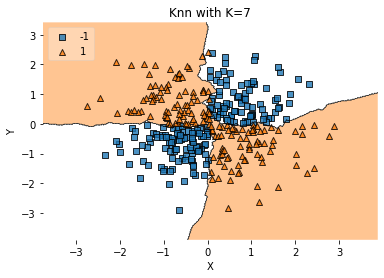

K :  8
Train Accuracy :  0.9856733524355301
Val Accuracy :  0.9656302521008403


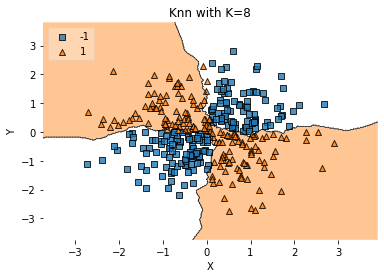

K :  9
Train Accuracy :  0.9742120343839542
Val Accuracy :  0.95109243697479


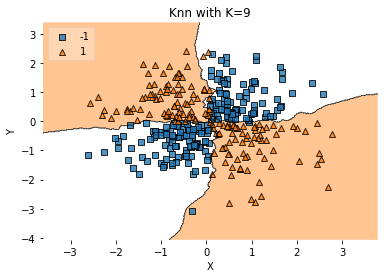

K :  10
Train Accuracy :  0.9799426934097422
Val Accuracy :  0.9628571428571429


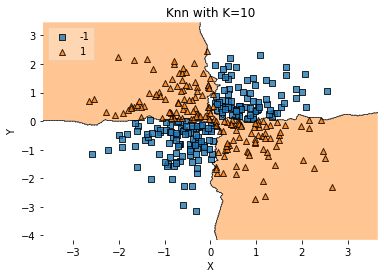

K :  11
Train Accuracy :  0.9770773638968482
Val Accuracy :  0.9599159663865546


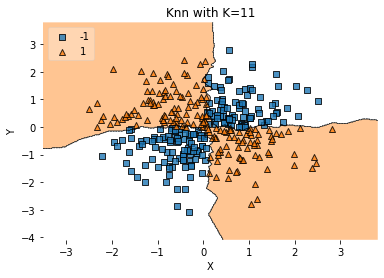

K :  12
Train Accuracy :  0.9684813753581661
Val Accuracy :  0.9398319327731093


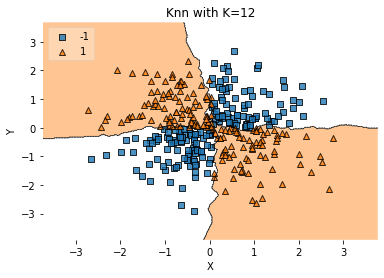

K :  13
Train Accuracy :  0.9742120343839542
Val Accuracy :  0.9570588235294117


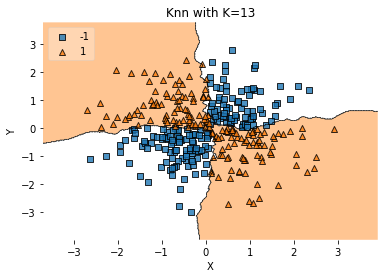

K :  14
Train Accuracy :  0.9713467048710601
Val Accuracy :  0.956890756302521


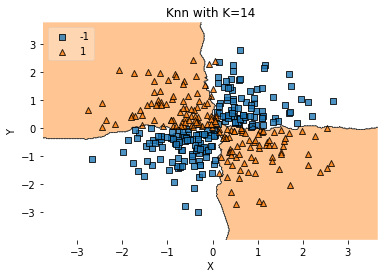

K :  15
Train Accuracy :  0.9684813753581661
Val Accuracy :  0.9342016806722689


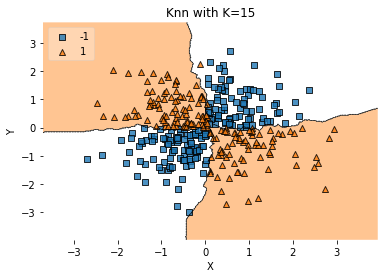

K :  16
Train Accuracy :  0.9656160458452722
Val Accuracy :  0.9456302521008404


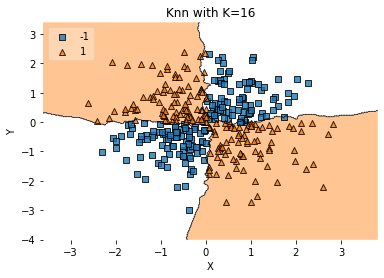

K :  27
Train Accuracy :  0.9713467048710601
Val Accuracy :  0.9569747899159664


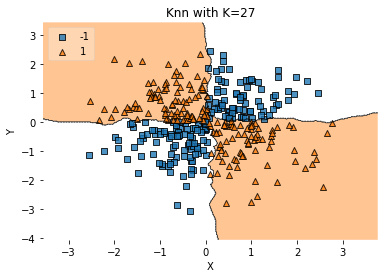

K :  28
Train Accuracy :  0.9512893982808023
Val Accuracy :  0.9370588235294118


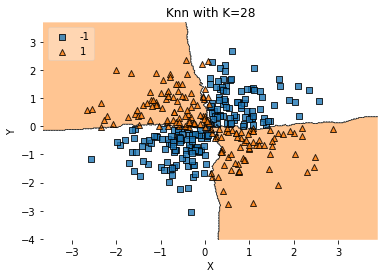

K :  19
Train Accuracy :  0.9656160458452722
Val Accuracy :  0.9426050420168067


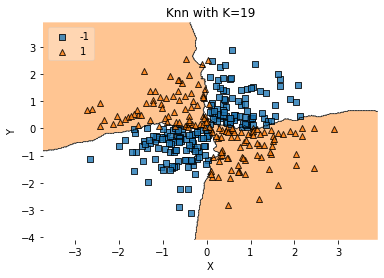

K :  20
Train Accuracy :  0.9742120343839542
Val Accuracy :  0.9570588235294117


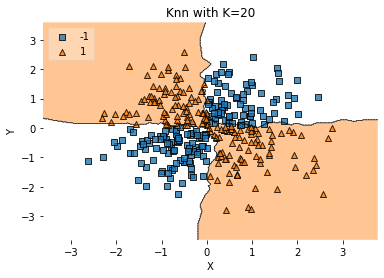

K :  30
Train Accuracy :  0.9426934097421203
Val Accuracy :  0.9137815126050421


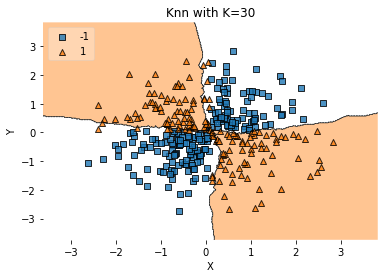

K :  40
Train Accuracy :  0.9570200573065902
Val Accuracy :  0.9253781512605043


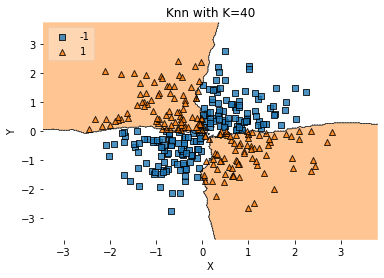

K :  60
Train Accuracy :  0.9512893982808023
Val Accuracy :  0.9342016806722689


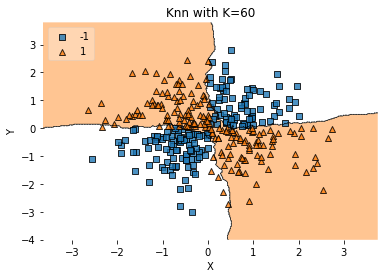

In [31]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,27,28,19,20,30,40,60]:
    knn_comparison(data3,i)
    #knn_no_plot(data3, i)

# Linearly Separable

In [32]:
data4 = pd.read_csv('linearsep.csv')
data4.columns=['X','Y','class']
data4

,X,Y,class
0,1.977424,1.766155,0.0
1,1.800024,1.700343,0.0
2,-0.770837,2.359163,1.0
3,-0.308009,1.594063,1.0
4,0.614721,2.434898,1.0
...,...,...,...
94,2.632382,1.271305,0.0
95,-0.040256,1.782708,1.0
96,-0.787453,1.400357,1.0
97,2.702441,1.587444,0.0


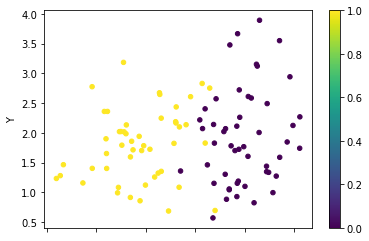

In [33]:
data4.plot(x='X', y='Y', c=data4['class'], kind='scatter', colormap='viridis')

In [34]:
# Separating features & target and splitting them as training & testing dataset
X = data4[['X','Y']].values
y = data4['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=7)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
k=[]
train_score=[]
cv_score=[]

# Calculating train and cv score on different K values
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn4 = KNeighborsClassifier(i) #initialising the model
    knn4.fit(x_train,y_train) # training the model
    #print("K value  : " , i, " train score : ", knn2.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn2, x_train, y_train, cv=10))) #predicting using the model
    k.append(i)
    train_score.append(knn4.score(x_train,y_train))
    cv_score.append(np.mean(cross_val_score(knn4, x_train, y_train, cv=10)))
    
score = {'K':k,'Train_Score':train_score,'CV_Score':cv_score}
score = pd.DataFrame(score)

n fold Cross validation where n being 10

In [36]:
score

,K,Train_Score,CV_Score
0,1,1.000000,0.942857
1,2,0.956522,0.942857
2,3,0.971014,0.971429
3,4,0.971014,0.971429
4,5,0.971014,0.971429
5,6,0.971014,0.957143
6,7,0.971014,0.957143
7,8,0.956522,0.957143
8,9,0.956522,0.957143
9,10,0.942029,0.957143


k = 3,4,5 are the best values of k - hyperparameter tuning

In [37]:
knn4 = KNeighborsClassifier(3)
knn4.fit(x_train,y_train)
print('PREDICTING KNN SCORE OF X,Y(0.6,-0.4):', knn4.predict(scaler.transform([[0.6,-0.4]])))

PREDICTING KNN SCORE OF X,Y(0.6,-0.4): [1.]


In [38]:
print('KNN SCORE OF TEST DATASET:',knn4.score(x_test,y_test))

KNN SCORE OF TEST DATASET: 0.8666666666666667


n fold Cross validation where n being 5

In [39]:
for i in [1,3,5,6,8,10,20,30,40]:
    knn_no_plot(data4, i)

K :  1  Train Accuracy :  1.0  Val Accuracy :  0.9394736842105263
K :  3  Train Accuracy :  0.9696969696969697  Val Accuracy :  0.9694736842105263
K :  5  Train Accuracy :  0.9696969696969697  Val Accuracy :  0.9489473684210527
K :  6  Train Accuracy :  0.9494949494949495  Val Accuracy :  0.9489473684210527
K :  8  Train Accuracy :  0.9494949494949495  Val Accuracy :  0.9489473684210527
K :  10  Train Accuracy :  0.9494949494949495  Val Accuracy :  0.9589473684210527
K :  20  Train Accuracy :  0.9494949494949495  Val Accuracy :  0.9489473684210527
K :  30  Train Accuracy :  0.9393939393939394  Val Accuracy :  0.9389473684210525
K :  40  Train Accuracy :  0.9393939393939394  Val Accuracy :  0.9389473684210525


K :  1
Train Accuracy :  1.0
Val Accuracy :  0.9095238095238095


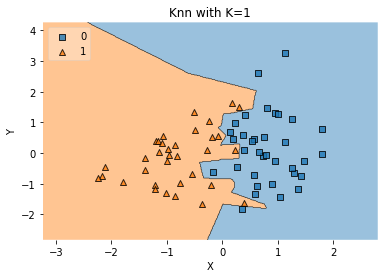

K :  3
Train Accuracy :  0.9565217391304348
Val Accuracy :  0.9714285714285715


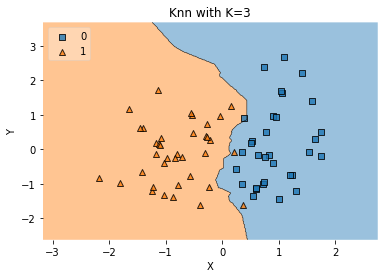

K :  5
Train Accuracy :  0.9420289855072463
Val Accuracy :  0.9142857142857143


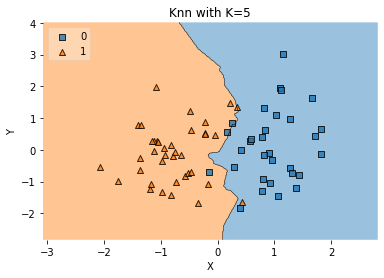

K :  6
Train Accuracy :  0.9710144927536232
Val Accuracy :  0.9714285714285715


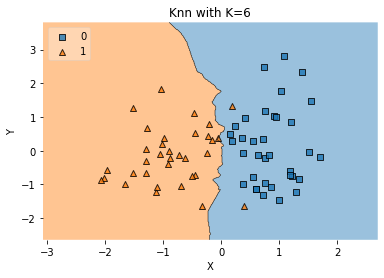

K :  8
Train Accuracy :  0.927536231884058
Val Accuracy :  0.911904761904762


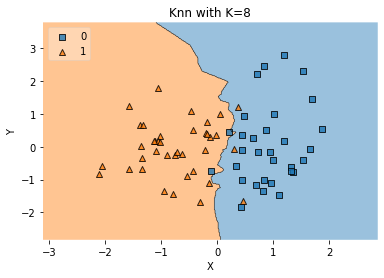

K :  10
Train Accuracy :  0.9565217391304348
Val Accuracy :  0.9428571428571428


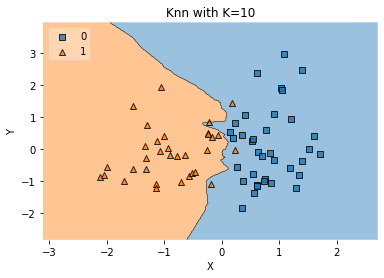

K :  20
Train Accuracy :  0.927536231884058
Val Accuracy :  0.9261904761904762


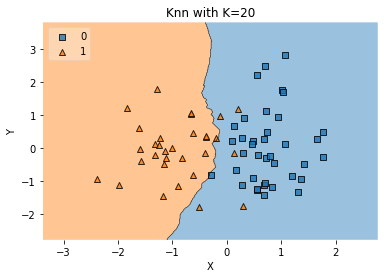

K :  30
Train Accuracy :  0.9130434782608695
Val Accuracy :  0.8809523809523808


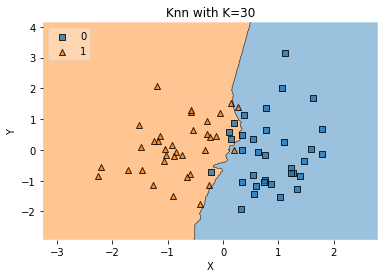

K :  40
Train Accuracy :  0.9420289855072463
Val Accuracy :  0.9095238095238095


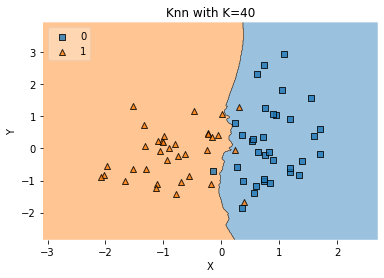

K :  50
Train Accuracy :  0.9565217391304348
Val Accuracy :  0.9404761904761905


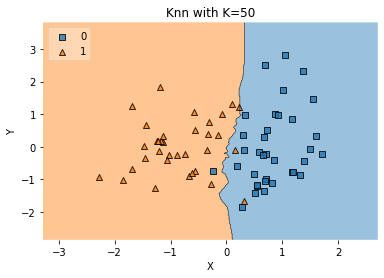

In [40]:
for i in [1,3,5,6,8,10,20,30,40,50]:
    knn_comparison(data4,i)
    #knn_no_plot(data3, i)

# Visualising the logistic regression decision boundary for k=1 for all data above

K :  1
Train Accuracy :  0.9494949494949495
Val Accuracy :  0.9489473684210527


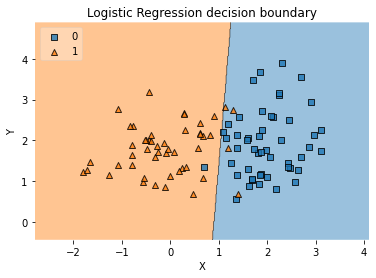

In [41]:
logistic(data4,1)

K :  1
Train Accuracy :  0.4468937875751503
Val Accuracy :  0.4589292929292929


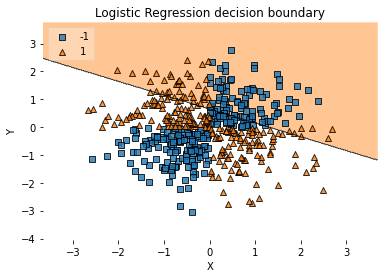

In [42]:
logistic(data3,1)

K :  1
Train Accuracy :  0.424
Val Accuracy :  0.41200000000000003


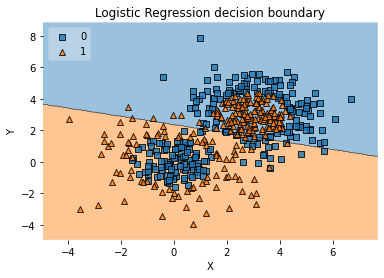

In [43]:
logistic(data2,1)

# Comparing Train & CV values for few k values

In [45]:
from sklearn.model_selection import cross_val_score
data = pd.read_csv('ushape.csv')
x = data[['X','Y']].values
y = data['class'].astype(int).values
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x,y)
  print("K value : ", k, " train score : ", clf.score(x,y) , " cv score : ", cross_val_score(clf,x,y,cv = 5, scoring = 'accuracy').mean())

K value :  1  train score :  1.0  cv score :  0.93
K value :  2  train score :  0.95  cv score :  0.93
K value :  3  train score :  0.96  cv score :  0.95
K value :  4  train score :  0.96  cv score :  0.9400000000000001
K value :  5  train score :  0.96  cv score :  0.95
K value :  6  train score :  0.96  cv score :  0.93
K value :  7  train score :  0.96  cv score :  0.93
K value :  8  train score :  0.96  cv score :  0.93
K value :  9  train score :  0.95  cv score :  0.9199999999999999
K value :  10  train score :  0.92  cv score :  0.9199999999999999
K value :  20  train score :  0.93  cv score :  0.8800000000000001
K value :  40  train score :  0.89  cv score :  0.8200000000000001
K value :  80  train score :  0.73  cv score :  0.5
